
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E0-MLP.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for regression and classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. MLP for classification (**)

Use the heart dataset that you worked with in the lab in Machine learning course and train an MLP on it. Gather your knowledge of MLP from the lecture and from the previous exercise to try and see if you can outperform your previous model. Note that an important part is to perform systematic scientific experimentation. 

#### Plan för att analysera heart datasetet:  
Typ av problem: binärt klassificeringsproblem (cardio eller inte cardio)  
Dataset: Använder samma data som i Machine Learning kursen. Feature engineering är redan gjord.  
Två dataset finns:  
1. Linjär data:  
2. Kategorisk data:  

Workflow:  
1. Läs in data, gör EDA, kom ihåg vad vi gjorde i ML kursen, mm. Börjar med categorical data eftersom den visade bäst resultat i ML kursen.  
2. Definiera Explanatory Variables (X) och Response Variable (y)  
3. Definera träningsdata, valideringsdata och testdata (train/val/test-split)  
4. Normalisera datan med Standard scaler  
5. Bygg modellen (definiera en funktion som bygger modellen baserat på argument)  
6. Utvärdera modellen/modellerna.


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
df_cat = pd.read_csv(r'data/cardio_train_linear.csv', sep=';')
df_cat.head()

,age,gender,cholesterol,gluc,cardio,BMI_class_normal,BMI_class_overweight,BMI_class_obese class I,BMI_class_obese class II,BMI_class_obese class III,BP_class_normal,BP_class_elevated,BP_class_high_stage_1,BP_class_high_stage_2,BP_class_high_crisis
0,18393,2,1,1,0,1,0,0,0,0,1,0,0,0,0
1,20228,1,3,1,1,0,0,0,1,0,0,0,0,1,0
2,18857,1,3,1,1,1,0,0,0,0,0,0,1,0,0
3,17623,2,1,1,1,0,1,0,0,0,0,0,0,1,0
4,17474,1,1,1,0,1,0,0,0,0,1,0,0,0,0


In [56]:
X, y = df_cat.drop('cardio', axis=1), df_cat['cardio']

In [57]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=80/318, random_state=42)
X_train.shape, X_test.shape, X_val.shape

((54704, 14), (13677, 14), (13763, 14))

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_val_scaled = scaler.transform(X_train_val)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [59]:
import keras
from keras import layers
from keras.optimizers import SGD, Adam

In [60]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss = "sparse_categorical_crossentropy"


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def make_model(nodes = None, names = None, activations = [], optimizer=None, loss=loss):
    model = keras.Sequential(name="MLP")
    #model.add(layers.Flatten(input_shape=(28,28), name="Input"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, name=name, activation=activation))

    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return model

def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs",
                        ylabel=metric[0], title=metric[0],
                        ylim=(0, 1),
                        ax=ax, style=style)


def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix", model_name="model_name"):
    cm = confusion_matrix(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, target_names=labels)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix\n{model_name}")
    plt.show()
    print(classification_rep)

Defining optimizer and loss function:

## Model_1
Defining model_deep_1:

In [62]:
model_deep_1 = make_model([128,128,10], activations=["relu", "relu", "softmax"], names=["Hidden_1", "Hidden_2", "Output"], optimizer=optimizer, loss = loss)
model_deep_1.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
#model_deep_1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
model_deep_1.fit(X_train_val_scaled, y_train_val, epochs=25, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0) # provar detta istället för validation_split

In [64]:
deep_1_history = pd.DataFrame(model_deep_1.history.history)

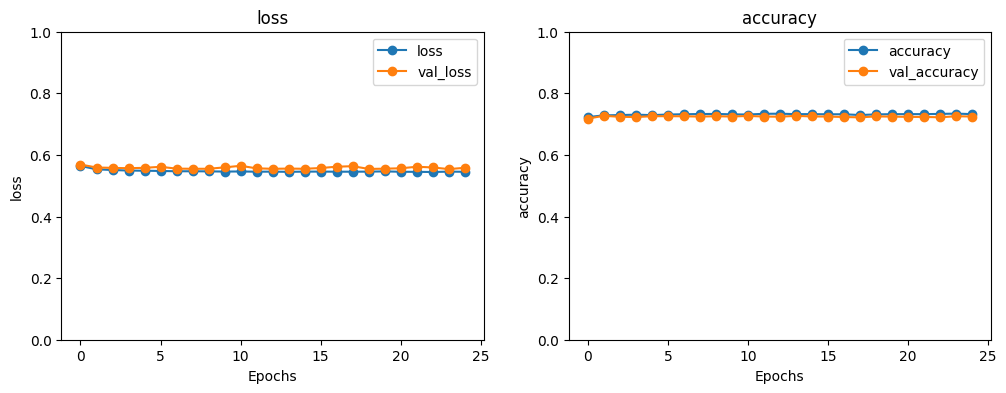

In [65]:
plot_metrics(deep_1_history)

Predict y_pred.

In [66]:
model_deep_1_y_pred = model_deep_1.predict(X_test_scaled)

428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


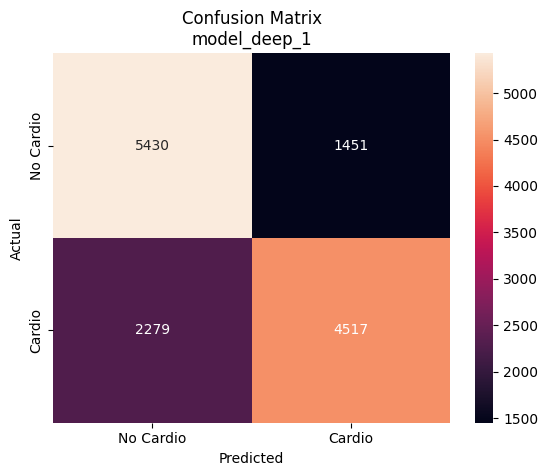

              precision    recall  f1-score   support

   No Cardio       0.70      0.79      0.74      6881
      Cardio       0.76      0.66      0.71      6796

    accuracy                           0.73     13677
   macro avg       0.73      0.73      0.73     13677
weighted avg       0.73      0.73      0.73     13677



In [67]:
plot_confusion_matrix(y_test, model_deep_1_y_pred.argmax(axis=1), ["No Cardio", "Cardio"], model_name="model_deep_1")

## Model2:
Defining model_deep_2:

In [70]:
model_deep_2 = make_model([128,128,128,10], activations=["relu", "relu","relu","softmax"], names=["Hidden_1", "Hidden_2","Hidden_3","Output"], optimizer=optimizer, loss = loss)
model_deep_2.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_3 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

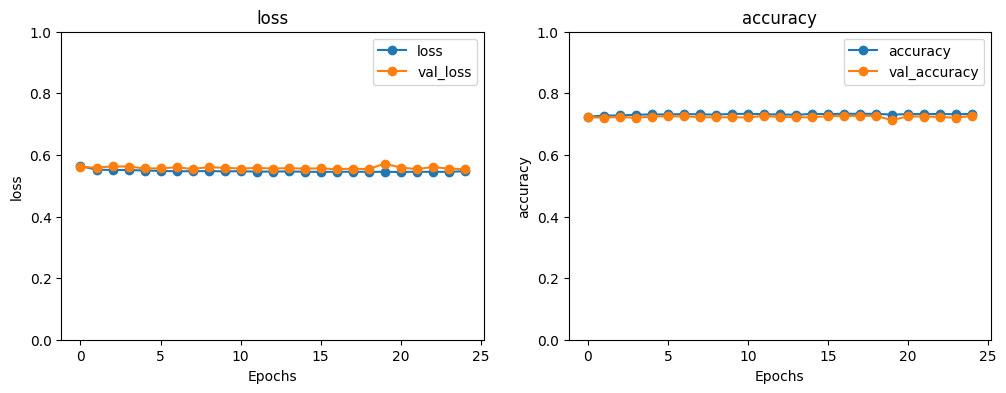

In [71]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss = "sparse_categorical_crossentropy"

#model_deep_2.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
model_deep_2.fit(X_train_val_scaled, y_train_val, epochs=25, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)
deep_2_history = pd.DataFrame(model_deep_2.history.history)
plot_metrics(deep_2_history)

In [72]:
model_deep_2_y_pred = model_deep_2.predict(X_test_scaled)

428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


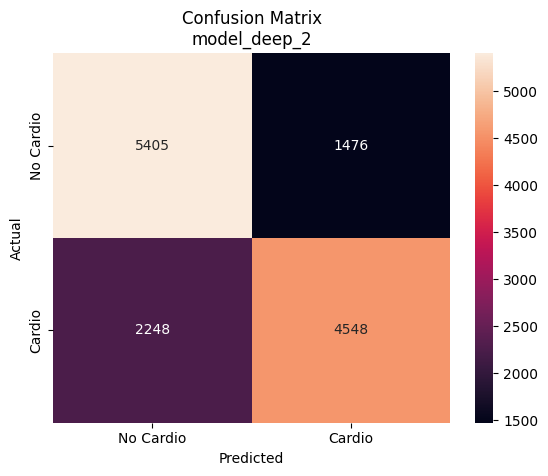

              precision    recall  f1-score   support

   No Cardio       0.71      0.79      0.74      6881
      Cardio       0.75      0.67      0.71      6796

    accuracy                           0.73     13677
   macro avg       0.73      0.73      0.73     13677
weighted avg       0.73      0.73      0.73     13677



In [73]:
plot_confusion_matrix(y_test, model_deep_2_y_pred.argmax(axis=1), ["No Cardio", "Cardio"], model_name="model_deep_2")

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---